# 1-Importando as bibliotecas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib
import numpy as np
import pandas as pd
import os

# 2-Descomprimindo a pasta do dataset

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/catarata/
  inflating: dataset/catarata/_0_4015166.jpg  
  inflating: dataset/catarata/_1_5346540.jpg  
  inflating: dataset/catarata/_1_7703314.jpg  
  inflating: dataset/catarata/_10_3215668.jpg  
  inflating: dataset/catarata/_100_334408.jpg  
  inflating: dataset/catarata/_101_5139882.jpg  
  inflating: dataset/catarata/_101_709333.jpg  
  inflating: dataset/catarata/_102_1024926.jpg  
  inflating: dataset/catarata/_102_3990401.jpg  
  inflating: dataset/catarata/_103_5897328.jpg  
  inflating: dataset/catarata/_104_4607170.jpg  
  inflating: dataset/catarata/_105_5646774.jpg  
  inflating: dataset/catarata/_105_5956883.jpg  
  inflating: dataset/catarata/_106_5284713.jpg  
  inflating: dataset/catarata/_107_5060742.jpg  
  inflating: dataset/catarata/_108_750835.jpg  
  inflating: dataset/catarata/_108_8917257.jpg  
  inflating: dataset/catarata/_109_2006348.jpg  
  inflating: dataset/catarata/_109_2655056.jpg  
  inflating: data

#3-Fazendo a listagem do conteúdo do dataset

In [ ]:
caminho_pasta = '/content/dataset'
dir = os.listdir('/content/dataset')

print(dir)

['catarata', 'diabete_ritinopatica', 'glaucoma', 'normal']


# 4-Faz o plot da quantidade de imagens que serão usadas

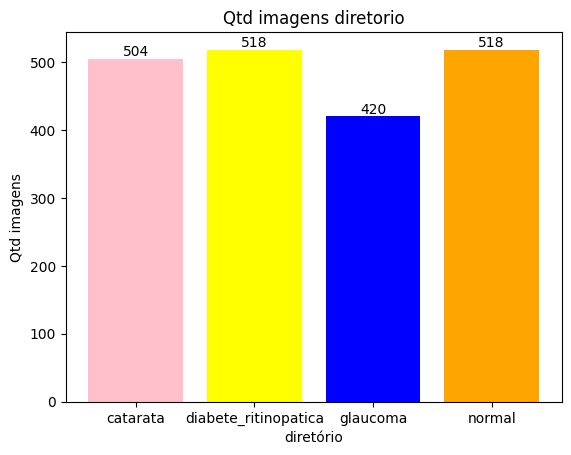

In [ ]:
#Qtd de imagens em cada pasta
qtd_imagens = []
for diretorio in dir:
    sub_dir = os.path.join(caminho_pasta, diretorio)
    if os.path.isdir(sub_dir):
        qtd_arq = len(os.listdir(sub_dir))
        qtd_imagens.append(qtd_arq)

#Valor da quantidade total de imagens
for i in range(len(dir)):
    plt.text(i, qtd_imagens[i], str(qtd_imagens[i]), ha='center', va='bottom')

#Cores das barras do gráfico
cores = ['pink', 'yellow', 'blue', 'orange']

#Plotagem
plt.bar(dir, qtd_imagens, color=cores)
plt.xlabel('diretório')
plt.ylabel('Qtd imagens')
plt.title('Qtd imagens diretorio')
plt.show()

# 5-Especificando as pastas a serem analisadas

In [ ]:
normal = pathlib.Path("/content/dataset/normal")
glaucoma = pathlib.Path("/content/dataset/glaucoma")
diabete = pathlib.Path("/content/dataset/diabete_ritinopatica")
catarata = pathlib.Path("/content/dataset/catarata")

# 6-Criando os dicionários de nomes e imagens para os testes


In [ ]:
img_dic = {"normal": list(normal.glob("*.jpg")),
              "glaucoma": list(glaucoma.glob("*.jpg")),
              "diabete_ritinopatica":list(diabete.glob("*.jpg")),
              "catarata":list(catarata.glob("*.jpg"))}
nome_dic = {
    "normal":0, "glaucoma":1, "diabete_ritinopatica":2, "catarata":3
}

# 7-Plotando uma imagem

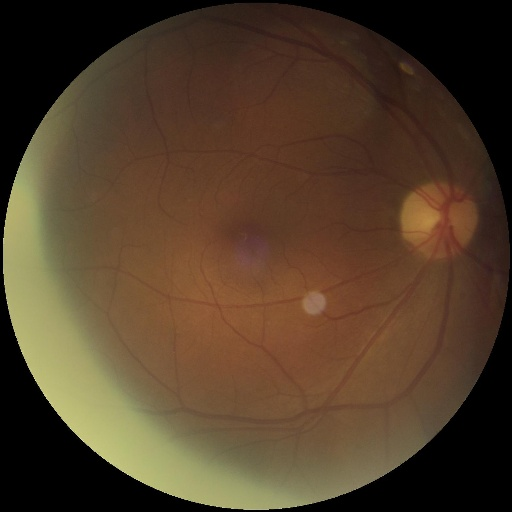

In [ ]:
PIL.Image.open(str(img_dic["normal"][200]))

# 8-Formatando as imagens

In [ ]:
X, y = [], []
for nome, images in img_dic.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (180, 180))
        if image is not None:
            X.append(image)
            y.append(nome_dic[nome])

In [ ]:
X = np.array(X)
y = np.array(y)

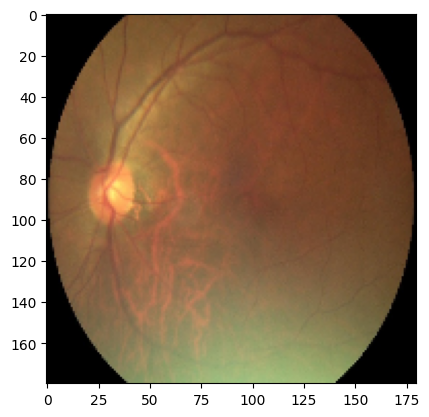

In [ ]:
plt.imshow(X[0])
plt.show()

In [ ]:
X = X/255

# 9-Criando os testes

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)

In [ ]:
X_treino = X_treino.astype("float32")
X_teste = X_teste.astype("float32")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [ ]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.7)
])

In [ ]:
model = keras.Sequential([
    data_argumentation,
    layers.Conv2D(64, (5, 5), padding="same",   input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
resultado = model.fit(X_treino, y_treino, epochs=50)

Epoch 1/50
37/37 [==============================] - 171s 5s/step - loss: 0.9371 - accuracy: 0.5490
Epoch 2/50
37/37 [==============================] - 165s 4s/step - loss: 0.9469 - accuracy: 0.5369
Epoch 3/50
37/37 [==============================] - 165s 4s/step - loss: 0.9227 - accuracy: 0.5559
Epoch 4/50
37/37 [==============================] - 166s 4s/step - loss: 0.9325 - accuracy: 0.5412
Epoch 5/50
37/37 [==============================] - 165s 4s/step - loss: 0.9204 - accuracy: 0.5455
Epoch 6/50
37/37 [==============================] - 164s 4s/step - loss: 0.9558 - accuracy: 0.5273
Epoch 7/50
37/37 [==============================] - 164s 4s/step - loss: 0.9164 - accuracy: 0.5473
Epoch 8/50
37/37 [==============================] - 165s 4s/step - loss: 0.9155 - accuracy: 0.5499
Epoch 9/50
37/37 [==============================] - 166s 4s/step - loss: 0.9086 - accuracy: 0.5533
Epoch 10/50
37/37 [==============================] - 166s 4s/step - loss: 0.9289 - accuracy: 0.5568
Epoch 11/

In [ ]:
model.evaluate(X_teste, y_teste)

10/10 [==============================] - 12s 1s/step - loss: 0.7515 - accuracy: 0.6678


[0.7514561414718628, 0.6678200960159302]

In [ ]:
pred = model.predict(X_teste[:10]) # predicting first 10 values
predslista = []
for i in pred:
    predslista.append(np.argmax(i)) # argmax() returns max value of an array

1/1 [==============================] - 0s 377ms/step


# 10-Geração de testes

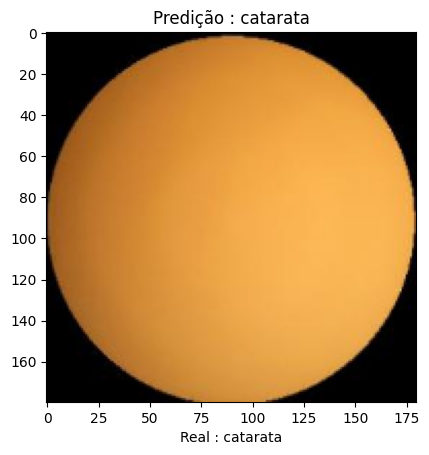

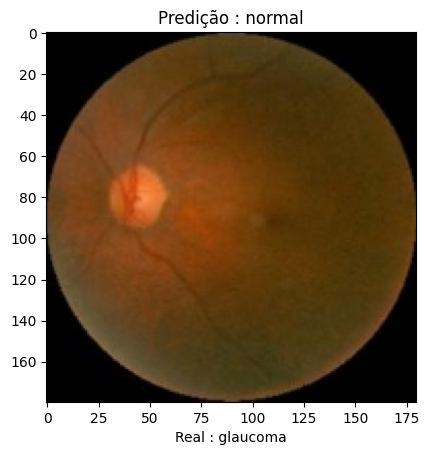

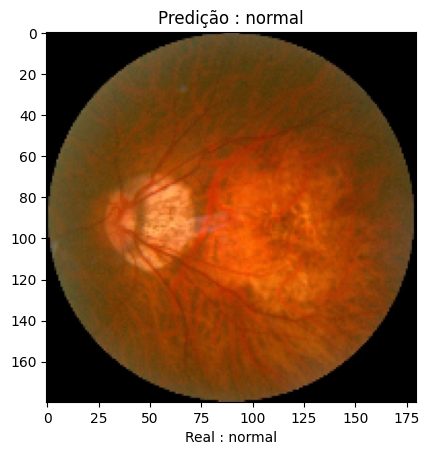

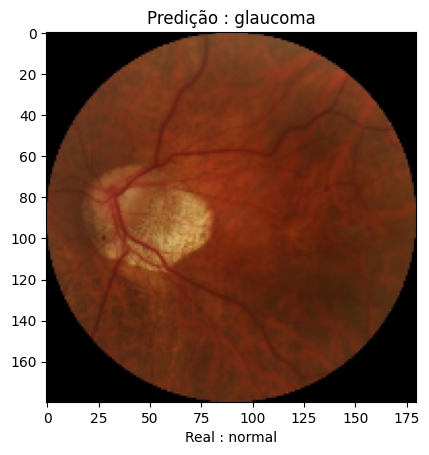

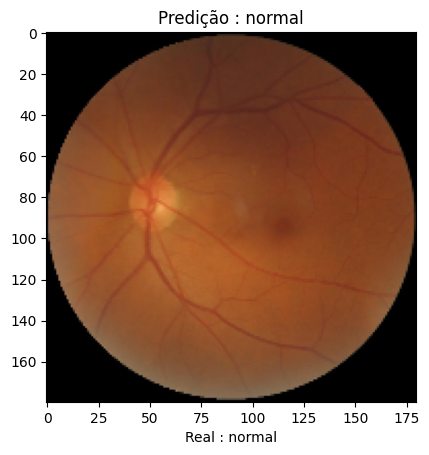

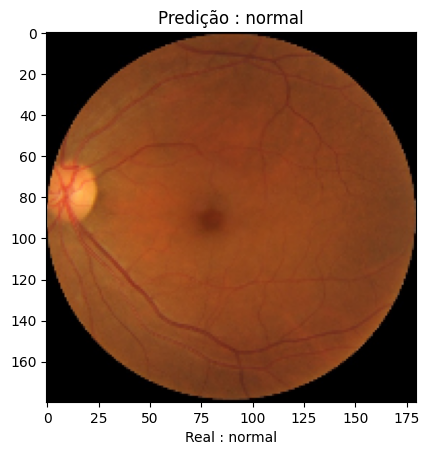

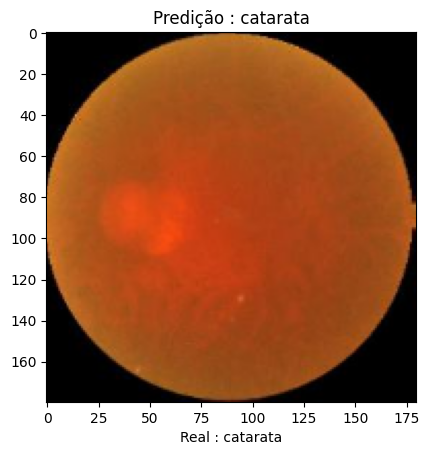

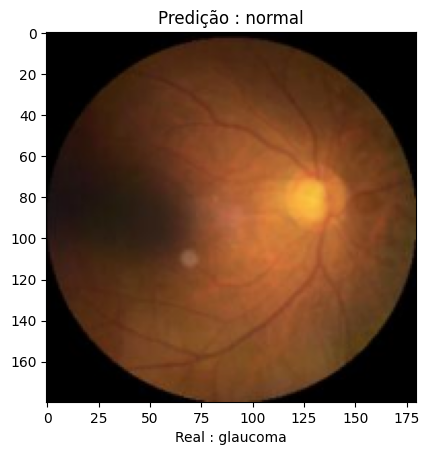

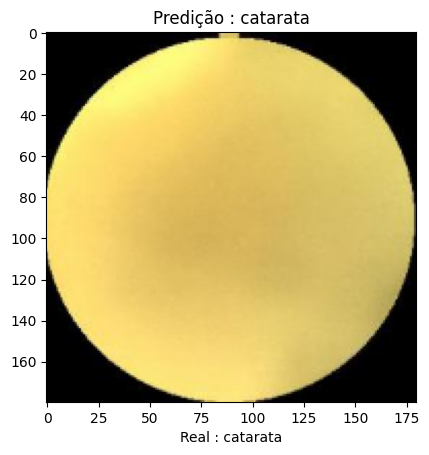

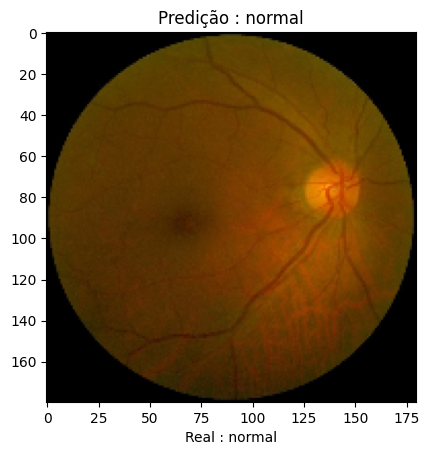

In [ ]:
resposta = ["normal", 'glaucoma', "diabete_ritinopatica", "catarata"]
for i in range(10):
    plt.imshow(X_teste[i])
    plt.title("Predição : "+ str(resposta[predslista[i]]))
    plt.xlabel("Real : "+str(resposta[y_teste[i]]))
    plt.show()